In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('D:/11 semester/ML/FINAL/Auto Sales data.csv')

In [7]:
df = df[['QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'DAYS_SINCE_LASTORDER', 'SALES']]


In [9]:
# Feature scaling
scaler = StandardScaler()
df[['QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'DAYS_SINCE_LASTORDER']] = scaler.fit_transform(df[['QUANTITYORDERED', 'PRICEEACH', 'MSRP', 'DAYS_SINCE_LASTORDER']])

In [11]:
X = df.drop('SALES', axis=1)
y = df['SALES']

In [13]:
# Select top k features 
selector = SelectKBest(score_func=f_regression, k=3)  
X_selected = selector.fit_transform(X, y)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [17]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [19]:
y_pred = knn.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')


MAE: 100.66918181818181
MSE: 29851.39380882827
RMSE: 172.77555906096288
R2: 0.9902073306835608


In [23]:
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

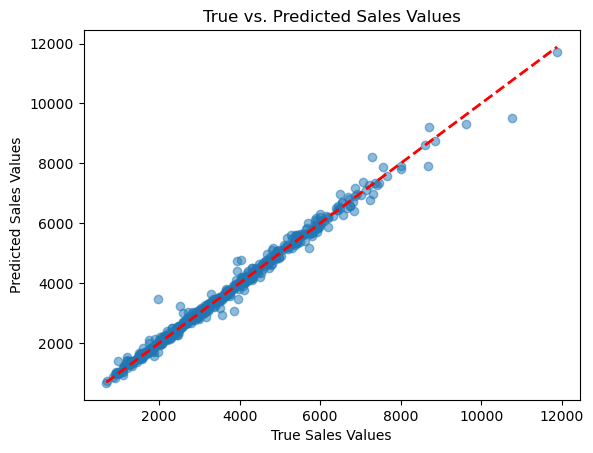

In [24]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True vs. Predicted Sales Values')
plt.xlabel('True Sales Values')
plt.ylabel('Predicted Sales Values')


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()